In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st
from datetime import datetime 

In [2]:
data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
display(data)

FileNotFoundError: [Errno 2] File csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv does not exist: 'csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

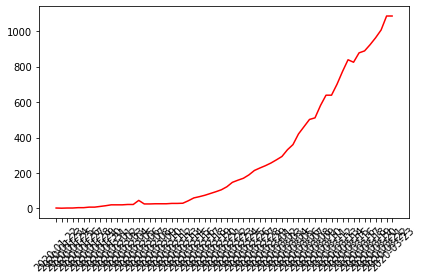

In [19]:
japan = data[data["Country/Region"] == "Japan"]
#display(japan)
time_ser = japan.iloc[:,4:]
#display(list(time_ser.iloc[0]))
fig, ax = plt.subplots()
fig.canvas.draw()
col = time_ser.iloc[0]
dates=list(time_ser)
date_object = datetime.strptime(dates[0], '%m/%d/%y')
x_values = [datetime.strptime(str(d),"%m/%d/%y").date() for d in dates]

plt.plot(dates, col, c = "red")

ax.set_xticklabels(x_values, rotation=45)
plt.tight_layout()

plt.show()


In [4]:
da = pd.read_csv("csse_covid_19_data/csse_covid_19_daily_reports/03-25-2020.csv")
au = da[da["Country_Region"] == "Australia"]
display(au)
T_R=sum(list(da["Recovered"]))
T_D=sum(list(da["Deaths"]))
T_C=sum(list(da["Confirmed"]))
AU_R=sum(list(au["Recovered"]))
AU_D=sum(list(au["Deaths"]))
AU_C=sum(list(au["Confirmed"]))
print("Confirmed in AU: ",sum(list(au["Confirmed"])))
print("Recovered in AU: ",sum(list(au["Recovered"])))
print("Deaths in AU:    ",sum(list(au["Deaths"])))
print("Total Confirmed: ",sum(list(da["Confirmed"])))
print("Total Recovered: ",sum(list(da["Recovered"])))
print("Total Deaths:    ",sum(list(da["Deaths"])))
print("Recover Rate:    ",np.round(T_R*100/T_C,3),"%")
print("Deaths Rate:     ",np.round(T_D*100/T_C,3),"%")
print("AU Recover Rate: ",np.round(AU_R*100/AU_C,3),"%")
print("AU Deaths Rate:  ",np.round(AU_D*100/AU_C,3),"%")        

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
3173,NaN,NaN,Australian Capital Territory,Australia,2020-03-25 23:37:49,-35.4735,149.0124,39,0,0,39,"Australian Capital Territory, Australia"
3217,NaN,NaN,New South Wales,Australia,2020-03-25 23:37:49,-33.8688,151.2093,1029,7,4,1018,"New South Wales, Australia"
3221,NaN,NaN,Northern Territory,Australia,2020-03-25 23:37:49,-12.4634,130.8456,6,0,0,6,"Northern Territory, Australia"
3228,NaN,NaN,Queensland,Australia,2020-03-25 23:37:49,-27.4698,153.0251,443,0,8,435,"Queensland, Australia"
3240,NaN,NaN,South Australia,Australia,2020-03-25 23:37:49,-34.9285,138.6007,170,0,6,164,"South Australia, Australia"
3242,NaN,NaN,Tasmania,Australia,2020-03-25 23:37:49,-42.8821,147.3272,36,0,3,33,"Tasmania, Australia"
3245,NaN,NaN,Victoria,Australia,2020-03-25 23:37:49,-37.8136,144.9631,466,0,97,369,"Victoria, Australia"
3247,NaN,NaN,Western Australia,Australia,2020-03-25 23:37:49,-31.9505,115.8605,175,1,1,173,"Western Australia, Australia"


Confirmed in AU:  2364
Recovered in AU:  119
Deaths in AU:     8
Total Confirmed:  467594
Total Recovered:  113770
Total Deaths:     21181
Recover Rate:     24.331 %
Deaths Rate:      4.53 %
AU Recover Rate:  5.034 %
AU Deaths Rate:   0.338 %
